<a href="https://colab.research.google.com/github/tonu1990/AI_CV_Projects/blob/main/Sudoku_Solving.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


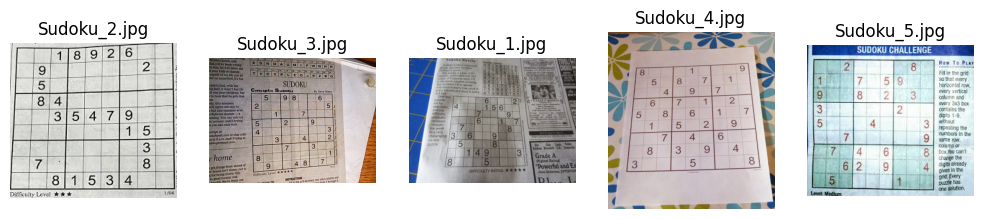

In [ ]:
# Display Sudoku Samples from Newspapers

import glob
import os
import matplotlib.pyplot as plt
from PIL import Image

sudoku_folder = '/content/drive/MyDrive/SelfLearning_AI/Sudoku/'

# get all images in path
sudoku_files = glob.glob(os.path.join(sudoku_folder, '*.jpg'))

# Display all images in a grid
plt.figure(figsize=(15, 15))

# Number of images per row
images_per_row = 6

# Display each image
for i, image_file in enumerate(sudoku_files):
    img = Image.open(image_file)
    plt.subplot(len(sudoku_files) // images_per_row + 1, images_per_row, i + 1)
    plt.imshow(img)
    plt.title(os.path.basename(image_file))
    plt.axis('off')

plt.show()



**Question**: Suggest the differences of using the below two approaches to get path in python to use in glob.glob()

In [ ]:
print(sudoku_folder+'*.jpg')
print(os.path.join(sudoku_folder, '*.jpg'))

/content/drive/MyDrive/SelfLearning_AI/Sudoku/*.jpg
/content/drive/MyDrive/SelfLearning_AI/Sudoku/*.jpg


Answer :  
* Using String Concatenation (sudoku_folder+'*.jpg'):
This simply appends '*.jpg' to the folder string. If your sudoku_folder doesn’t already end with a slash, the resulting path will be incorrect
* This approach is error-prone and not portable across different operating systems.

* Using os.path.join(sudoku_folder, '*.jpg'):
This method intelligently joins the folder path and the filename pattern, inserting the appropriate directory separator if needed
* It guarantees that you get a valid path, and it works correctly across different platforms.

**Preprocessing Image**

In [ ]:
def pre_process_image(img) :
  proc = img.copy()
  proc = cv2.GaussianBlur(proc, (9,9) ,0)
  proc = cv2.adaptiveThreshold(proc ,255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C , cv2.THRESH_BINARY , 11,2)
  proc = cv2.bitwise_not(proc,proc)

  return proc

* Gaussian Blur: The Gaussian blur smooths the image using a kernel size of 9×9 pixels. The third parameter (0) means that the standard deviation is calculated based on the kernel size.
   * It helps remove small-scale noise and details that are not important for detecting large shapes (like the sudoku grid).
   * This makes the subsequent thresholding step more robust, as the image gradients become less abrupt.

* Adaptive Thresholding: This converts the blurred grayscale image into a binary image
  * Since lighting can vary across the image (especially in newspaper images), adaptive thresholding ensures that even regions with different brightness levels are properly binarized.
  * It highlights the strong contrasts (edges and lines) that typically define the sudoku grid.
  * Adaptive Method (cv2.ADAPTIVE_THRESH_GAUSSIAN_C): Calculates a threshold for small regions of the image based on a weighted sum (Gaussian-weighted) of the neighborhood values.
  * Threshold Type (cv2.THRESH_BINARY): Produces a binary image (pixels are either 0 or 255).

* Bitwise Inversion: Inverts the binary image so that the regions which were white become black and vice versa.
  * Many contour detection algorithms (used later to extract the largest polygon, i.e., the sudoku grid) work better when the object of interest (the grid lines) is in white on a black background


**Find largest polygon**

In [ ]:
import operator
def find_corners_largest_polygon(img):
  countours , _ = cv2.findContours(img.copy(), cv2.RETR_EXTERNAL , cv2.CHAIN_APPROX_SIMPLE)
  countours = sorted(countours, key= cv2.contourArea , reverse=True)
  polygon = countours[0] # this will have number of points in the largest contour

  bottom_right, _= max(enumerate([pt[0][0] + pt[0][1] for pt in polygon]), key=operator.itemgetter(1))
  top_left, _ = min(enumerate([pt[0][0] + pt[0][1] for pt in polygon]), key=operator.itemgetter(1))
  bottom_left, _ = min(enumerate([pt[0][0] - pt[0][1] for pt in polygon]), key=operator.itemgetter(1))
  top_right, _ = max(enumerate([pt[0][0] - pt[0][1] for pt in polygon]), key=operator.itemgetter(1))
  return [polygon[top_left][0], polygon[top_right][0], polygon[bottom_right][0], polygon[bottom_left][0]]


In [ ]:
import numpy as np
def distance_between(p1, p2):
    """Returns the scalar distance between two points"""
    a = p2[0] - p1[0]
    b = p2[1] - p1[1]
    return np.sqrt((a ** 2) + (b ** 2))

def crop_and_wrap(img, crop_rect):
    """Crops and warps a rectangular section from an image into a square of similar size."""
    top_left, top_right, bottom_right, bottom_left = crop_rect[0], crop_rect[1], crop_rect[2], crop_rect[3]
    src = np.array([top_left, top_right, bottom_right, bottom_left], dtype='float32')
    side = max([
        distance_between(bottom_right, top_right),
        distance_between(top_left, bottom_left),
        distance_between(bottom_right, bottom_left),
        distance_between(top_left, top_right)
    ])
    dst = np.array([[0, 0], [side - 1, 0], [side - 1, side - 1], [0, side - 1]], dtype='float32')
    m = cv2.getPerspectiveTransform(src, dst)
    return cv2.warpPerspective(img, m, (int(side), int(side)))

In [ ]:
def extract_sudoku_block(img):
  # convert to gray scale
  sud_gray = cv2.cvtColor(sud_img , cv2.COLOR_BGR2GRAY)
  sud_processed = pre_process_image(sud_gray)
  corners = find_corners_largest_polygon(sud_processed)
  sud_cropped = crop_and_wrap(sud_gray,corners)
  squares = infer_grid(sud_cropped)
  digits = extract_digit_TF_classify(sud_cropped, squares, 28)


  ### Display original and sudoku region extracted
  # Create a figure with 1 row and 2 columns of subplots
  fig, axs = plt.subplots(1, 2, figsize=(8, 4))
  # Display the original image on the left subplot
  axs[0].imshow(sud_img)
  axs[0].axis('off')  # Hide axes
  axs[0].set_title("Original Image")

  # Display the processed image on the right subplot
  axs[1].imshow(sud_cropped)
  axs[1].axis('off')  # Hide axes
  axs[1].set_title("Processed Image")

  plt.tight_layout()
  plt.show()

  return sud_cropped


### **Indvidual Digit extraction and Prediction of Value using MNSIT OCR approach**

####  INCOMPLETE CONTINUE FROM HERE  ##########

In [ ]:
def infer_grid(img):
    """Infers 81 cell grid from a square image."""
    squares = []
    side = img.shape[:1]
    side = side[0] / 9
    for j in range(9):
        for i in range(9):
            p1 = (i * side, j * side)  # Top left corner of a bounding box
            p2 = ((i + 1) * side, (j + 1) * side)  # Bottom right corner of bounding box
            squares.append((p1, p2))
    return squares

In [ ]:
def cut_from_rect(img, rect):
	"""Cuts a rectangle from an image using the top left and bottom right points."""
	return img[int(rect[0][1]):int(rect[1][1]), int(rect[0][0]):int(rect[1][0])]

def scale_and_centre(img, size, margin=0, background=0):
	"""Scales and centres an image onto a new background square."""
	h, w = img.shape[:2]

def find_largest_feature(inp_img, scan_tl=None, scan_br=None):
	"""
	Uses the fact the `floodFill` function returns a bounding box of the area it filled to find the biggest
	connected pixel structure in the image. Fills this structure in white, reducing the rest to black.
	"""
	img = inp_img.copy()  # Copy the image, leaving the original untouched
	height, width = img.shape[:2]

	max_area = 0
	seed_point = (None, None)

	if scan_tl is None:
		scan_tl = [0, 0]

	if scan_br is None:
		scan_br = [width, height]

	# Loop through the image
	for x in range(scan_tl[0], scan_br[0]):
		for y in range(scan_tl[1], scan_br[1]):
			# Only operate on light or white squares
			if img.item(y, x) == 255 and x < width and y < height:  # Note that .item() appears to take input as y, x
				area = cv2.floodFill(img, None, (x, y), 64)
				if area[0] > max_area:  # Gets the maximum bound area which should be the grid
					max_area = area[0]
					seed_point = (x, y)

	# Colour everything grey (compensates for features outside of our middle scanning range
	for x in range(width):
		for y in range(height):
			if img.item(y, x) == 255 and x < width and y < height:
				cv2.floodFill(img, None, (x, y), 64)

	mask = np.zeros((height + 2, width + 2), np.uint8)  # Mask that is 2 pixels bigger than the image

	# Highlight the main feature
	if all([p is not None for p in seed_point]):
		cv2.floodFill(img, mask, seed_point, 255)

	top, bottom, left, right = height, 0, width, 0

	for x in range(width):
		for y in range(height):
			if img.item(y, x) == 64:  # Hide anything that isn't the main feature
				cv2.floodFill(img, mask, (x, y), 0)

			# Find the bounding parameters
			if img.item(y, x) == 255:
				top = y if y < top else top
				bottom = y if y > bottom else bottom
				left = x if x < left else left
				right = x if x > right else right

	bbox = [[left, top], [right, bottom]]
	return img, np.array(bbox, dtype='float32'), seed_point

def extract_digit(img, rect, size):
  img_copy = img

  digit = pre_process_image(img)
  digit = cut_from_rect(digit, rect)  # Get the digit box from the whole square
  h,w = digit.shape[:2]
  margin = int(np.mean([h,w])/2.5)
  _, bbox, seed = find_largest_feature(digit, [margin, margin], [w - margin, h - margin])
  img_copy = cut_from_rect(img_copy, bbox)

  digit = img_copy[int(bbox[0][1])-2: int(bbox[1][1]+2) , int(bbox[0][0])-2: int(bbox[1][0]+2)]

  w = bbox[1][0] - bbox[0][0]
  h = bbox[1][1] - bbox[0][1]

  if w > 0 and h > 0 and (w * h) > 100 and len(digit) > 0:
        plt.imshow(digit)
        plt.axis('off')  # Hide axis details
        plt.show()
  else:
      return np.zeros((1, 1), np.uint8)

def extract_digit_TF_classify(img, squares, size):
  digits =[]
  index = 0
  for square in squares :
    index = index+1
    extracted_digit_img = extract_digit(img, square, size)

    if extracted_digit_img.shape != (1,1):
      pass

    else :
      digits.append(0)
  return digits

In [ ]:
import cv2
import matplotlib.pyplot as plt

for i, image_file in enumerate(sudoku_files):
  pass

# read the Sudoku image
sud_img = cv2.imread(image_file)
sudoku_block =extract_sudoku_block(sud_img)
